
# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization


from warnings import filterwarnings
filterwarnings('ignore')


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Read dataset into DataFrame</p>

In [2]:
df=pd.read_csv('/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv')
df

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Features Metadata</p>

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

|Feature | Description
|------|------------
|**Country** | countries has been collected from the same WHO data repository website 
|**Year**|year 2013-2000
|**Status**|Status of country **Developing** or **Developed**
|**Life expectancy**|Life Expectancy in age **our target**
|**Adult Mortality**|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
|**infant deaths**|Number of Infant Deaths per 1000 population
|**Alcohol**|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
|**percentage expenditure**|Expenditure on health as a percentage of Gross Domestic Product per capita(%)
|**Hepatitis B**|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
|**Measles**|Measles - number of reported cases per 1000 population
|**BMI**|Average Body Mass Index of entire population
|**under-five deaths**|Number of under-five deaths per 1000 population
|**Polio**|Polio (Pol3) immunization coverage among 1-year-olds (%)
|**Total expenditure**|General government expenditure on health as a percentage of total government expenditure (%)
|**Diphtheria**|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
|**HIV/AIDS**|Deaths per 1 000 live births HIV/AIDS (0-4 years)
|**GDP**|Gross Domestic Product per capita (in USD)
|**Population**|Population of the country
|**thinness  1-19 years**|Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
|**thinness 5-9 years**|Prevalence of thinness among children for Age 5 to 9(%)
|**Income composition of resources**|Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
|**Schooling**|Number of years of Schooling(years)


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

# **<font color = #208AAE>DataFrame Shape</font>**

In [4]:
#print number of rows and columns in the dataset

print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 2938
Number of Features: 22


# **<font color = #208AAE>DataFrame Info</font>**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### **<font color = #208AAE>From previous result we can put in our mind that:</font>**

#### **<font color = #8b7a5e>Numerical Features are:</font>**

- 'Year'
- 'Life expectancy '
- 'Adult Mortality'
- 'infant deaths'
- 'Alcohol'
- 'percentage expenditure'
- 'Hepatitis B'
- 'Measles '
- ' BMI '
- 'under-five deaths '
- 'Polio'
- 'Total expenditure'
- 'Diphtheria '
- ' HIV/AIDS'
- 'GDP'
- 'Population'
- ' thinness  1-19 years'
- ' thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

#### **<font color = #8b7a5e>Categorical Features (which need encoding later) are:</font>**

- 'Country'
- 'Status'

#### **<font color = #8b7a5e>Columns that have null values (which need handling later):</font>**

- 'Life expectancy '
- 'Adult Mortality'
- 'Alcohol'
- 'Hepatitis B'
- ' BMI '
- 'Polio'
- 'Total expenditure'
- 'Diphtheria '
- 'GDP'
- 'Population'
- ' thinness  1-19 years'
- ' thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

#### **<font color = #8b7a5e>Target Feature:</font>**

- 'Life expectancy '

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# **<font color = #208AAE>Statistical Info for Numerical Features</font>**

In [7]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

# **<font color = #208AAE>Exploring Numerical Features</font>**

- 'Year'
- 'Life expectancy '
- 'Adult Mortality'
- 'infant deaths'
- 'Alcohol'
- 'percentage expenditure'
- 'Hepatitis B'
- 'Measles '
- ' BMI '
- 'under-five deaths '
- 'Polio'
- 'Total expenditure'
- 'Diphtheria '
- ' HIV/AIDS'
- 'GDP'
- 'Population'
- ' thinness  1-19 years'
- ' thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

In [8]:
df.head().T

0            1            2  \
Country                          Afghanistan  Afghanistan  Afghanistan   
Year                                    2015         2014         2013   
Status                            Developing   Developing   Developing   
Life expectancy                         65.0         59.9         59.9   
Adult Mortality                        263.0        271.0        268.0   
infant deaths                             62           64           66   
Alcohol                                 0.01         0.01         0.01   
percentage expenditure             71.279624    73.523582    73.219243   
Hepatitis B                             65.0         62.0         64.0   
Measles                                 1154          492          430   
BMI                                     19.1         18.6         18.1   
under-five deaths                         83           86           89   
Polio                                    6.0         58.0         62.0   
Total expenditure                       8.16         8.18         8.13   
Diphtheria                              65.0         62.0         64.0   
HIV/AIDS                                 0.1          0.1          0.1   
GDP                                584.25921   612.696514   631.744976   
Population                        33736494.0     327582.0   31731688.0   
thinness  1-19 years                    17.2         17.5         17.7   
thinness 5-9 years                      17.3         17.5         17.7   
Income composition of resources        0.479        0.476         0.47   
Schooling                               10.1         10.0          9.9   

                                           3            4  
Country                          Afghanistan  Afghanistan  
Year                                    2012         2011  
Status                            Developing   Developing  
Life expectancy                         59.5         59.2  
Adult Mortality                        272.0        275.0  
infant deaths                             69           71  
Alcohol                                 0.01         0.01  
percentage expenditure             78.184215     7.097109  
Hepatitis B                             67.0         68.0  
Measles                                 2787         3013  
BMI                                     17.6         17.2  
under-five deaths                         93           97  
Polio                                   67.0         68.0  
Total expenditure                       8.52         7.87  
Diphtheria                              67.0         68.0  
HIV/AIDS                                 0.1          0.1  
GDP                                  669.959    63.537231  
Population                         3696958.0    2978599.0  
thinness  1-19 years                    17.9         18.2  
thinness 5-9 years                      18.0         18.2  
Income composition of resources        0.463        0.454  
Schooling                                9.8          9.5

In [9]:
# col =[- 'Year', 'Life expectancy ' ,'Adult Mortality','infant deaths', 'Alcohol','percentage expenditure','Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria '
# , ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in cols:
    print(i, df[i].value_counts())
    print('-----------------------------------')

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------
Life expectancy Life expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: count, Length: 425, dtype: int64
-----------------------------------
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
171      1
201      1
215      1
253      1
110      1
Name: count, Length: 209, dtype: int64
-----------------------------------
Alcohol Alcohol
0.01    288
0.03     15
0.04 

# **<font color = #208AAE>Exploring Categorical Features</font>**

#### **<font color = #8b7a5e>'Country' Feature</font>**

In [10]:
df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

#### **<font color = #8b7a5e>'Status' Feature</font>**

In [11]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Cleaning</p>

# **<font color = #208AAE>Handling Missing Values</font>**
- 'Life expectancy '
- 'Adult Mortality'
- 'Alcohol'
- 'Hepatitis B'
- ' BMI '
- 'Polio'
- 'Total expenditure'
- 'Diphtheria '
- 'GDP'
- 'Population'
- ' thinness  1-19 years'
- ' thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

In [12]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

## **As the number of Missing Values is large I will use Imputing Method to fill null values with mean Value**

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

df['Life expectancy']=imputer.fit_transform(df[['Life expectancy']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df['BMI']=imputer.fit_transform(df[['BMI']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria']=imputer.fit_transform(df[['Diphtheria']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df['thinness  1-19 years']=imputer.fit_transform(df[['thinness  1-19 years']])
df['thinness 5-9 years']=imputer.fit_transform(df[['thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [14]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# **<font color = #208AAE>Handling Outliers</font>**

#### **<font color = #8b7a5e>First I will draw boxplot to check outliers</font>**

In [15]:
# Loop through each column and create a box plot
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')
    
    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'  
    )
    
    fig.show()

#### **<font color = #8b7a5e>Second, dealing with outliers</font>**

In [16]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])


#### **<font color = #8b7a5e>Thirdly I will draw boxplot to check outliers after handling it</font>**

In [17]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')
    
    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'  
    )
    
    fig.show()


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Visualization</p>

In [18]:
#using plotly draw count plot for df['Year'] 
fig = px.histogram(df, x='Year', color='Year', title='Count Plot for Year to number of countries')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year to number of countries</b>', x=0.5)
)

fig.show()

In [19]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(df.sort_values(by='Year'), x='Year', y='Life expectancy',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

In [20]:
#using plotly draw count plot for df['Status'] and color each bar with different color
fig = px.histogram(df, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

## **Life expectancy for developing and developed Countries**

### **<font color = #8b7a5e>Developing</font>**

In [21]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developing']
# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='Ages',
    yaxis_title='Number of Countries',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

> **Range is from like 41 to 90 in Developing Countries**

### **<font color = #8b7a5e>Developed</font>**

In [22]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developed']

# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='Ages',
    yaxis_title='Number of Countries',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

> **Range is from like 70 to 90 in Developed Countries**

In [23]:
#using plotly to visualize Average Adult Mortality of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'}), 
             x='Status', 
             y='Adult Mortality', 
             color='Status',
             title='Average Adult Mortality of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Adult Mortality of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()  

In [24]:
#using plotly to visualize Average Infant deaths of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'infant deaths':'mean'}), 
             x='Status', 
             y='infant deaths', 
             color='Status',
             title='Average Infant deaths of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Infant deaths of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()  

> **Developing Countries have highest Adult Mortality and Infant deaths**

In [25]:
#using plotly to visualize Average Alcohol consumption of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'Alcohol':'mean'}), 
             x='Status', 
             y='Alcohol', 
             color='Status',
             title='Average Alcohol consumption of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Alcohol consumption of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [26]:
#using plotly to visualize scatter ploy of Life expectancy vs Adult Mortality for countries over years
fig = px.scatter(df.sort_values(by='Year'), x='Life expectancy', y='Adult Mortality',color='Country', size='Year', title='Life expectancy vs Adult Mortality for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Adult Mortality for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [27]:
#using plotly to visualize scatter ploy of Life expectancy vs Infant deaths for Countries over Years
fig = px.scatter(df.sort_values(by='Year'), x='Life expectancy', y='infant deaths',color='Country', size='Year', title='Life expectancy vs Infant deaths for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Infant deaths for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [28]:
#using plotly to visualize scatter ploy of Life expectancy vs HIV/AIDS for Countries over Years
fig = px.scatter(df.sort_values(by='Year'), x='Life expectancy', y='HIV/AIDS',color='Country', size='Year', title='Life expectancy vs HIV/AIDS for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs HIV/AIDS for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [29]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for selected numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x='Columns', y='Columns', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='blues',
                title='Heatmap: Correlation Matrix of Numeric Columns')


fig.update_layout(title_text='<b> Heatmap: Correlation Matrix of Numeric Columns </b>', title_x=0.5 ,width=800 ,height=800)
fig.show()


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

# **<font color = #208AAE>Handling Categorical Features (encoding)</font>**

- 'Country'
- 'Status'

#### **<font color = #8b7a5e>Values Before Handling</font>**

In [30]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [31]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [32]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

#### **<font color = #8b7a5e>Values After Handling</font>**

In [33]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [34]:
df['Status'].unique()

array([1, 0])

# **<font color = #208AAE>Splitting Features from Target</font>**

In [35]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [36]:
X

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0           0  2015       1       263.000000      30.303948     0.01   
1           0  2014       1       271.000000      30.303948     0.01   
2           0  2013       1       268.000000      30.303948     0.01   
3           0  2012       1       272.000000      30.303948     0.01   
4           0  2011       1       275.000000      30.303948     0.01   
...       ...   ...     ...              ...            ...      ...   
2933      192  2004       1       164.796448      27.000000     4.36   
2934      192  2003       1       164.796448      26.000000     4.06   
2935      192  2002       1        73.000000      25.000000     4.43   
2936      192  2001       1       164.796448      25.000000     1.72   
2937      192  2000       1       164.796448      24.000000     1.68   

      percentage expenditure  Hepatitis B     Measles   BMI  ...      Polio  \
0                  71.279624    65.000000  2419.59224  19.1  ...  82.550188   
1                  73.523582    62.000000   492.00000  18.6  ...  58.000000   
2                  73.219243    64.000000   430.00000  18.1  ...  62.000000   
3                  78.184215    67.000000  2419.59224  17.6  ...  67.000000   
4                   7.097109    68.000000  2419.59224  17.2  ...  68.000000   
...                      ...          ...         ...   ...  ...        ...   
2933                0.000000    68.000000    31.00000  27.1  ...  67.000000   
2934                0.000000    80.940461  2419.59224  26.7  ...  82.550188   
2935                0.000000    73.000000   304.00000  26.3  ...  73.000000   
2936                0.000000    76.000000   529.00000  25.9  ...  76.000000   
2937                0.000000    79.000000  2419.59224  25.5  ...  78.000000   

      Total expenditure  Diphtheria  HIV/AIDS         GDP    Population  \
0                  8.16        65.0  0.100000  584.259210  1.275338e+07   
1                  8.18        62.0  0.100000  612.696514  3.275820e+05   
2                  8.13        64.0  0.100000  631.744976  1.275338e+07   
3                  8.52        67.0  0.100000  669.959000  3.696958e+06   
4                  7.87        68.0  0.100000   63.537231  2.978599e+06   
...                 ...         ...       ...         ...           ...   
2933               7.13        65.0  1.742103  454.366654  1.277751e+07   
2934               6.52        68.0  1.742103  453.351155  1.263390e+07   
2935               6.53        71.0  1.742103   57.348340  1.255250e+05   
2936               6.16        75.0  1.742103  548.587312  1.236616e+07   
2937               7.10        78.0  1.742103  547.358878  1.222225e+07   

      thinness  1-19 years  thinness 5-9 years  \
0                 4.839704            4.870317   
1                 4.839704            4.870317   
2                 4.839704            4.870317   
3                 4.839704            4.870317   
4                 4.839704            4.870317   
...                    ...                 ...   
2933              9.400000            9.400000   
2934              9.800000            9.900000   
2935              1.200000            1.300000   
2936              1.600000            1.700000   
2937             11.000000           11.200000   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 21 columns]

# **<font color = #208AAE>Data Scaling</font>**

In [37]:
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [38]:
X

Country      Year  Status  Adult Mortality  infant deaths   Alcohol  \
0         0.0  1.000000       1         0.578366       0.550981  0.000000   
1         0.0  0.933333       1         0.596026       0.550981  0.000000   
2         0.0  0.866667       1         0.589404       0.550981  0.000000   
3         0.0  0.800000       1         0.598234       0.550981  0.000000   
4         0.0  0.733333       1         0.604857       0.550981  0.000000   
...       ...       ...     ...              ...            ...       ...   
2933      1.0  0.266667       1         0.361582       0.490909  0.262523   
2934      1.0  0.200000       1         0.361582       0.472727  0.244418   
2935      1.0  0.133333       1         0.158940       0.454545  0.266747   
2936      1.0  0.066667       1         0.361582       0.454545  0.103199   
2937      1.0  0.000000       1         0.361582       0.436364  0.100785   

      percentage expenditure  Hepatitis B   Measles       BMI  ...     Polio  \
0                   0.065265     0.150000  1.000000  0.209733  ...  0.657296   
1                   0.067320     0.075000  0.203340  0.203940  ...  0.145833   
2                   0.067041     0.125000  0.177716  0.198146  ...  0.229167   
3                   0.071587     0.200000  1.000000  0.192352  ...  0.333333   
4                   0.006498     0.225000  1.000000  0.187717  ...  0.354167   
...                      ...          ...       ...       ...  ...       ...   
2933                0.000000     0.225000  0.012812  0.302433  ...  0.333333   
2934                0.000000     0.548512  1.000000  0.297798  ...  0.657296   
2935                0.000000     0.350000  0.125641  0.293163  ...  0.458333   
2936                0.000000     0.425000  0.218632  0.288528  ...  0.520833   
2937                0.000000     0.500000  1.000000  0.283893  ...  0.562500   

      Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0              0.686949    0.291667  0.000000  0.032752    0.408423   
1              0.688713    0.229167  0.000000  0.034350    0.010490   
2              0.684303    0.270833  0.000000  0.035421    0.408423   
3              0.718695    0.333333  0.000000  0.037570    0.118393   
4              0.661376    0.354167  0.000000  0.003477    0.095388   
...                 ...         ...       ...       ...         ...   
2933           0.596120    0.291667  0.965943  0.025449    0.409196   
2934           0.542328    0.354167  0.965943  0.025392    0.404596   
2935           0.543210    0.416667  0.965943  0.003130    0.004019   
2936           0.510582    0.500000  0.965943  0.030746    0.396022   
2937           0.593474    0.562500  0.965943  0.030677    0.391413   

      thinness  1-19 years  thinness 5-9 years  \
0                 0.311823            0.309761   
1                 0.311823            0.309761   
2                 0.311823            0.309761   
3                 0.311823            0.309761   
4                 0.311823            0.309761   
...                    ...                 ...   
2933              0.611842            0.603896   
2934              0.638158            0.636364   
2935              0.072368            0.077922   
2936              0.098684            0.103896   
2937              0.717105            0.720779   

      Income composition of resources  Schooling  
0                            0.325180   0.360000  
1                            0.320863   0.353333  
2                            0.312230   0.346667  
3                            0.302158   0.340000  
4                            0.289209   0.320000  
...                               ...        ...  
2933                         0.221583   0.300000  
2934                         0.237410   0.320000  
2935                         0.250360   0.353333  
2936                         0.250360   0.340000  
2937                         0.260432   0.340000  

[2938 rows x 21 columns]

# **<font color = #208AAE>Splitting data into Train Test</font>**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Different Models</p>


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Building ANN Model</p>

### **<font color = "purple">Model Structure</font>**

In [41]:
model = Sequential([
        Dense(64, activation='relu', input_dim=21),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])

### **<font color = "purple">Model Compiling</font>**

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

### **<font color = "purple">Model Summary</font>**

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

### **<font color = "purple">Model Visualization</font>**

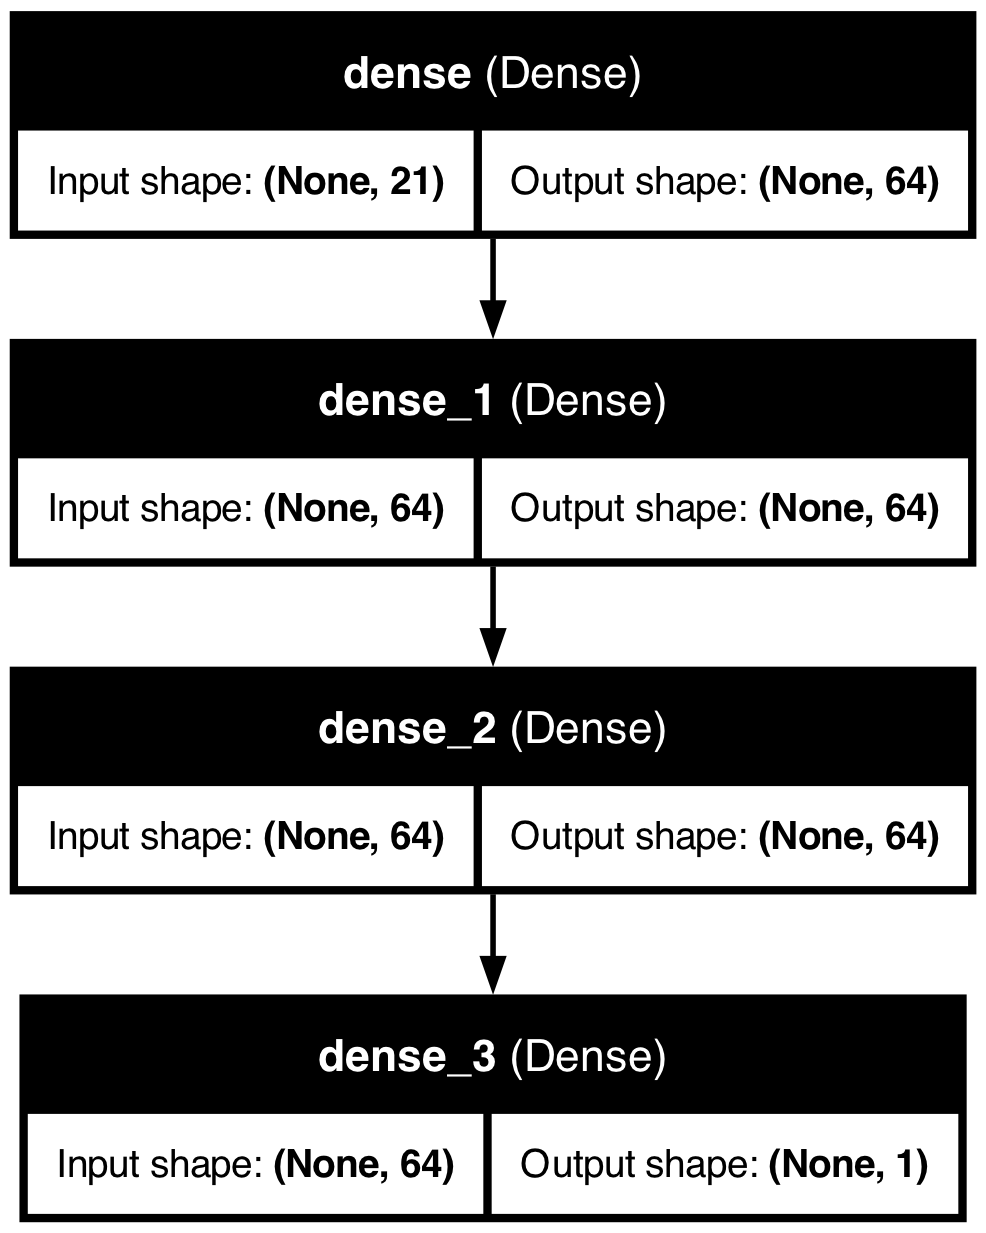

In [44]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **<font color = "purple">Model Fitting</font>**

In [45]:
history = model.fit(X_train, y_train, epochs=445, validation_split=0.2)

Epoch 1/445
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4464.4150 - mean_absolute_error: 65.8324 - mean_squared_error: 4464.4150 - val_loss: 356.0077 - val_mean_absolute_error: 16.6853 - val_mean_squared_error: 356.0077
Epoch 2/445
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 192.3872 - mean_absolute_error: 11.0988 - mean_squared_error: 192.3872 - val_loss: 84.7553 - val_mean_absolute_error: 7.5327 - val_mean_squared_error: 84.7553
Epoch 3/445
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 77.2551 - mean_absolute_error: 6.9838 - mean_squared_error: 77.2551 - val_loss: 67.9296 - val_mean_absolute_error: 6.6963 - val_mean_squared_error: 67.9296
Epoch 4/445
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 64.4171 - mean_absolute_error: 6.4263 - mean_squared_error: 64.4171 - val_loss: 59.9981 - val_mean_absolute_error: 6.2945 - val_mean_squared_error: 59.9981
Epoch 5/445
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 57.8960 - mean_absolute_error: 6.0686 - mean_squared_error: 57

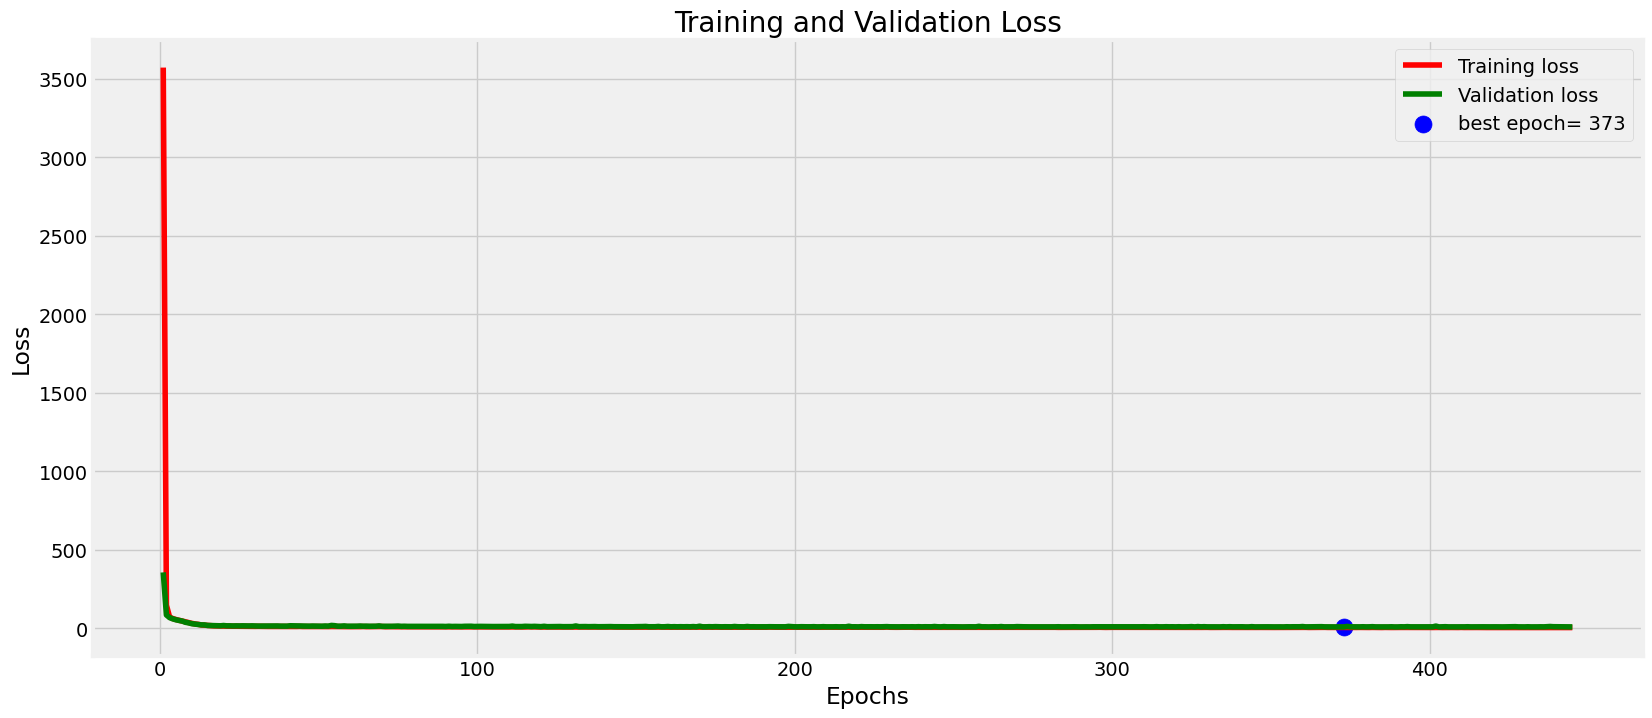

In [46]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [47]:
#metrics=['mean_absolute_error','mean_squared_error']

# mae = history.history['mean_absolute_error']

# acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
#                             "Loss" : tr_loss,
#                             "Epoch" : Epochs})

# acc_loss_df.style.bar(color = '#84A9AC',
#                       subset = ['Mean Absolute error','Loss'])

### **<font color = "purple">Prediction</font>**

In [48]:
y_pred_ann = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


In [49]:
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
R2_ann = r2_score(y_test, y_pred_ann)
print("R2 Score ANN=",R2_ann )

mse_ann = mean_squared_error(y_test, y_pred_ann)
print("MSE ANN: ",mse_ann)

R2 Score ANN= 0.916584910479677
MSE ANN:  7.226689378849801


In [51]:
# Assuming X_train, y_train, X_test, and y_test are already defined

# Fit the model
# history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

# Get predictions
y_pred_ann = model.predict(X_test).flatten()

# Define bins and labels for classification
bins = [0, 50, 70, 90, 100]  # Example bins: low, medium, high life expectancy
labels = ['Low', 'Medium', 'High', 'Very High']

# Convert y_test and y_pred_dl to categories
y_test_categories_ann = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_pred_categories_ann = pd.cut(y_pred_ann, bins=bins, labels=labels, right=False)

# Map categories to integers
category_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}

# Convert categories to integers
y_test_encoded_ann = y_test_categories_ann.map(category_map).astype(int)
y_pred_encoded_ann = y_pred_categories_ann.map(category_map).astype(int)

# Calculate F1 Score and Precision Score
f1_ann = f1_score(y_test_encoded_ann, y_pred_encoded_ann, average='weighted')
precision_ann = precision_score(y_test_encoded_ann, y_pred_encoded_ann, average='weighted')

print(f"F1 Score ANN: {f1_ann}")
print(f"Precision Score ANN: {precision_ann}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
F1 Score ANN: 0.9245703322846108
Precision Score ANN: 0.9244543377196438


<h1>Feed-forward Neural Network</h1>

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv("/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv")

# Preprocessing: Handling missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
null_cols = data[numeric_cols].columns[data[numeric_cols].isnull().any()]

# Fill null values with column mean
data[null_cols] = data[null_cols].fillna(data[null_cols].mean())

# Feature and Target Variables
X = data.drop(columns=['Life expectancy', 'Country', 'Status'])
y = data['Life expectancy']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Training the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32, callbacks=[early_stop], verbose=1)

# Predictions
y_pred_dl = model.predict(X_test).flatten()

# Evaluation
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)

print(f"Neural Network Model - Mean Squared Error: {mse_dl}")
print(f"Neural Network Model - R2 Score: {r2_dl}")


bins = [0, 50, 70, 90, 100]  
labels = ['Low', 'Medium', 'High', 'Very High']
y_test_categories = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_pred_categories = pd.cut(y_pred_dl, bins=bins, labels=labels, right=False)


category_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}


y_test_encoded = y_test_categories.map(category_map).astype(int)
y_pred_encoded = y_pred_categories.map(category_map).astype(int)


f1_dl = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
precision_dl = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

print(f"Feed Forward Neural Network Model - Mean Squared Error: {f1_dl}")
print(f"Feed Forward Neural Network Model - R2 Score: {precision_dl}")

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4446.8125 - val_loss: 1120.5101
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 618.4898 - val_loss: 153.7065
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 236.1396 - val_loss: 114.5321
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 197.4824 - val_loss: 94.7851
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 187.0117 - val_loss: 82.6622
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 171.0439 - val_loss: 71.6657
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 152.5716 - val_loss: 66.8591
Epoch 8/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 138.5320 - val_loss: 61.0212
Epoch 9/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 134.4965 - val_loss: 60.2065
Epoch 10/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 127.0556 - val_loss: 48.1718
Epoch 11/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 114.3970 - val_loss: 44.6007
Epoch

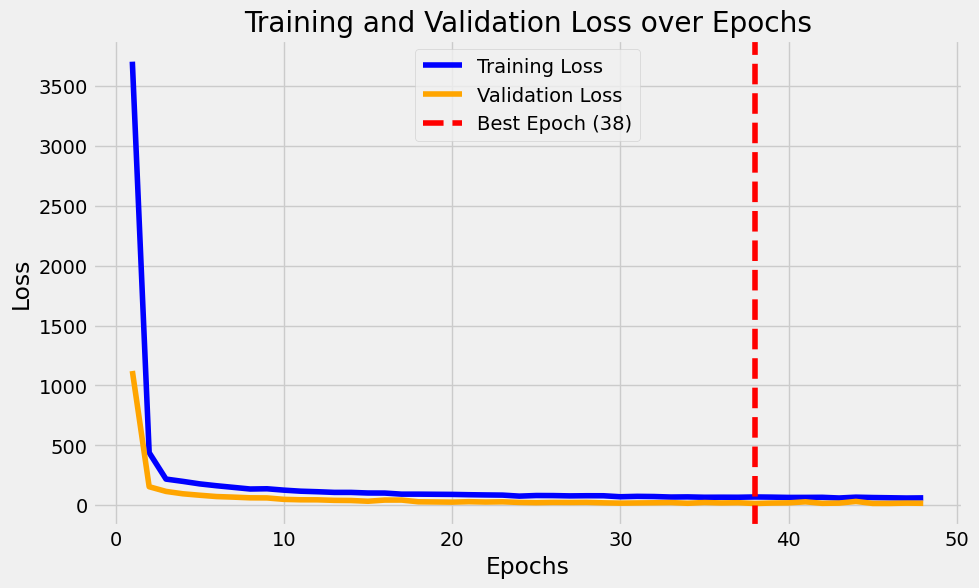

In [53]:


# Extract the history of training and validation loss
history_data = history.history
epochs = range(1, len(history_data['loss']) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, history_data['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history_data['val_loss'], label='Validation Loss', color='orange')

# Highlighting the best epoch (minimum validation loss)
best_epoch = np.argmin(history_data['val_loss']) + 1
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')

# Adding labels and title
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


<h1>LSTM MODEL</h1>

In [54]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset
data = pd.read_csv("/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv")

# Preprocessing: Handle missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
null_cols = data[numeric_cols].columns[data[numeric_cols].isnull().any()]

# Fill null values with column mean
data[null_cols] = data[null_cols].fillna(data[null_cols].mean())

# Feature and Target Variables
X = data.drop(columns=['Life expectancy', 'Country', 'Status'])
y = data['Life expectancy']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)  # Add a "timesteps" dimension
X_test_lstm = np.expand_dims(X_test, axis=1)

# Build the LSTM Model
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the Model
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_lstm = model.predict(X_test_lstm).flatten()

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model - Mean Squared Error: {mse_lstm}")
print(f"LSTM Model - R2 Score: {r2_lstm}")

# Classification Metrics (Binned)
bins = [0, 50, 70, 90, 100]
labels = ['Low', 'Medium', 'High', 'Very High']

y_test_categories = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_pred_categories = pd.cut(y_pred_lstm, bins=bins, labels=labels, right=False)

category_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
y_test_encoded = y_test_categories.map(category_map).astype(int)
y_pred_encoded = y_pred_categories.map(category_map).astype(int)

f1_lstm = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
precision_lstm = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

print(f"F1 Score: {f1_lstm}")
print(f"Precision Score: {precision_lstm}")


Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4819.4224 - val_loss: 4215.2725
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3445.9253 - val_loss: 1608.1915
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1175.8397 - val_loss: 165.9309
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151.7709 - val_loss: 52.0802
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.1994 - val_loss: 40.7106
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75.1332 - val_loss: 34.6482
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.0040 - val_loss: 30.9392
Epoch 8/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.1707 - val_loss: 28.3997
Epoch 9/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.5494 - val_loss: 26.6807
Epoch 10/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.1554 - val_loss: 25.1618
Epoch 11/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.4485 - val_loss: 23.3664
Epoch 12/150
59/59 ━━━━━━━━━━

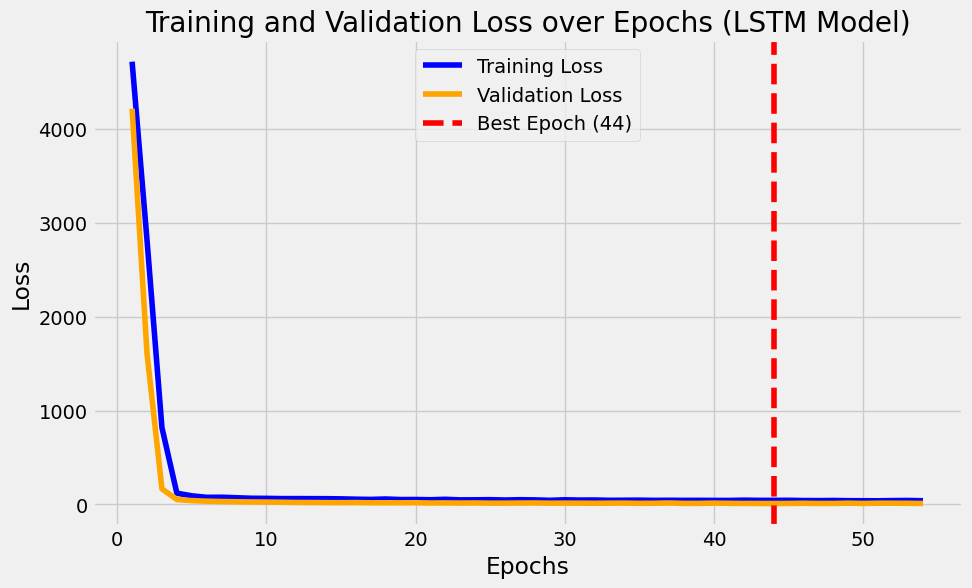

In [55]:


# Extract the history of training and validation loss
history_data = history.history
epochs = range(1, len(history_data['loss']) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, history_data['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history_data['val_loss'], label='Validation Loss', color='orange')

# Highlighting the best epoch (minimum validation loss)
best_epoch = np.argmin(history_data['val_loss']) + 1
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')

# Adding labels and title
plt.title('Training and Validation Loss over Epochs (LSTM Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


<h1>MODEL MADE BY US</h1>

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv("/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv")


print("MODIFIED CODE FOR NEURAL NETWORK USED ABOVE")
print("WITH INCREASED PRECISION AND ANOTHER SCORES")

print("\n\n")

# Preprocessing: Handling missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
null_cols = data[numeric_cols].columns[data[numeric_cols].isnull().any()]
data[null_cols] = data[null_cols].fillna(data[null_cols].mean())

# Feature and Target Variables
X = data.drop(columns=['Life expectancy', 'Country', 'Status'])
y = data['Life expectancy']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adjusted Neural Network Architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),  # Increased neurons, added L2 regularization
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Regression output
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model with Early Stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,  # Increased epochs for better convergence
    batch_size=16,  # Reduced batch size for more granular updates
    verbose=1
)

# Predictions
y_pred_dl = model.predict(X_test).flatten()

# Evaluation Metrics
mse_new = mean_squared_error(y_test, y_pred_dl)
r2_new = r2_score(y_test, y_pred_dl)

# Binned Classification Metrics (for F1 and Precision)
bins = [0, 50, 70, 90, 100]
labels = ['Low', 'Medium', 'High', 'Very High']

y_test_categories = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_pred_categories = pd.cut(y_pred_dl, bins=bins, labels=labels, right=False)

category_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
y_test_encoded = y_test_categories.map(category_map).astype(int)
y_pred_encoded = y_pred_categories.map(category_map).astype(int)

f1_new = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
precision_new = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

print(f"Modified Neural Network - Mean Squared Error: {mse_new}")
print(f"Modified Neural Network - R2 Score: {r2_new}")
print(f"F1 Score: {f1_new}")
print(f"Precision Score: {precision_new}")


MODIFIED CODE FOR NEURAL NETWORK USED ABOVE
WITH INCREASED PRECISION AND ANOTHER SCORES



Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2979.7153 - val_loss: 129.8109
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 180.1723 - val_loss: 96.4740
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 134.1021 - val_loss: 82.3357
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110.6238 - val_loss: 55.5874
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 93.0570 - val_loss: 50.7897
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 83.9877 - val_loss: 50.8755
Epoch 7/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 77.4963 - val_loss: 36.6254
Epoch 8/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 68.5281 - val_loss: 36.1879
Epoch 9/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 64.5701 - val_loss: 43.2098
Epoch 10/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 64.3773 - val_loss: 33.6

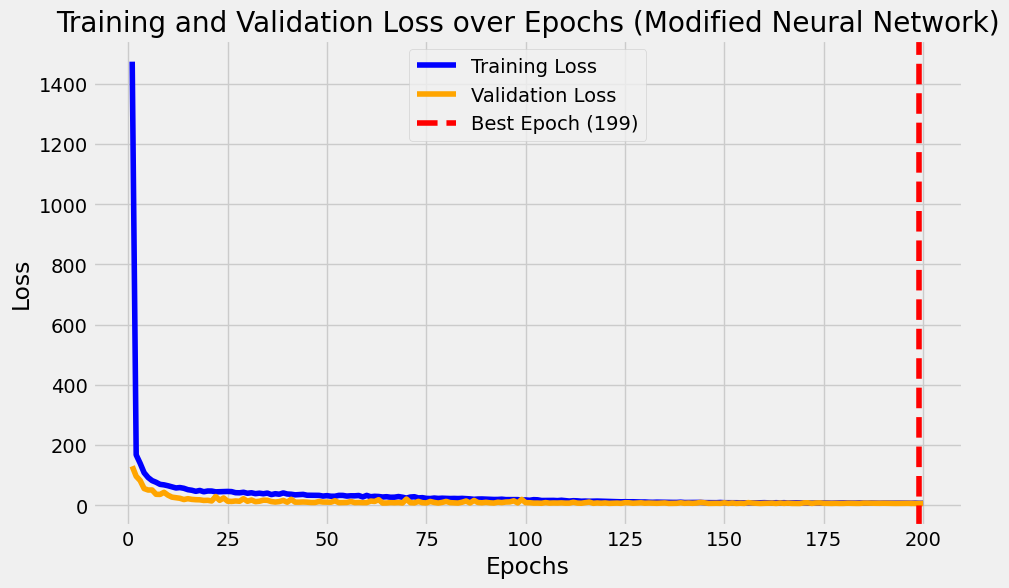

In [57]:


# Extract the history of training and validation loss
history_data = history.history
epochs = range(1, len(history_data['loss']) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, history_data['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history_data['val_loss'], label='Validation Loss', color='orange')

# Highlighting the best epoch (minimum validation loss)
best_epoch = np.argmin(history_data['val_loss']) + 1
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')

# Adding labels and title
plt.title('Training and Validation Loss over Epochs (Modified Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [58]:
print("ANN MODEL DIFFERENT SCORES: ")
print("MSE ANN: ",mse_ann)
print("R2 Score ANN=",R2_ann )
print(f"F1 Score ANN: {f1_ann}")
print(f"Precision Score ANN: {precision_ann}")

print("\n\n")

print("ANOTHER NEURAL NETWORK MODEL")
print(f"Mean Squared Error: {mse_dl}")
print(f"R2 Score: {r2_dl}")
print(f"F1 Score: {f1_dl}")
print(f"Precision Score: {precision_dl}")

print("\n\n")

print("LSTM MODEL different scores")
print(f"Mean Squared Error: {mse_lstm}")
print(f"R2 Score: {r2_lstm}")
print(f"F1 Score: {f1_lstm}")
print(f"Precision Score: {precision_lstm}")

print("\n\n")

print("New MODEL different scores")
print(f"Mean Squared Error: {mse_new}")
print(f"R2 Score: {r2_new}")
print(f"F1 Score: {f1_new}")
print(f"Precision Score: {precision_new}")

ANN MODEL DIFFERENT SCORES: 
MSE ANN:  7.226689378849801
R2 Score ANN= 0.916584910479677
F1 Score ANN: 0.9245703322846108
Precision Score ANN: 0.9244543377196438



ANOTHER NEURAL NETWORK MODEL
Mean Squared Error: 13.940085602356307
R2 Score: 0.8390945801759935
F1 Score: 0.8569149799068575
Precision Score: 0.8662962328629921



LSTM MODEL different scores
Mean Squared Error: 8.05959448177943
R2 Score: 0.9069709849211571
F1 Score: 0.908050054497624
Precision Score: 0.9124789123456499



New MODEL different scores
Mean Squared Error: 4.534432972303913
R2 Score: 0.9476606627904027
F1 Score: 0.9279715323698785
Precision Score: 0.9285726754044726


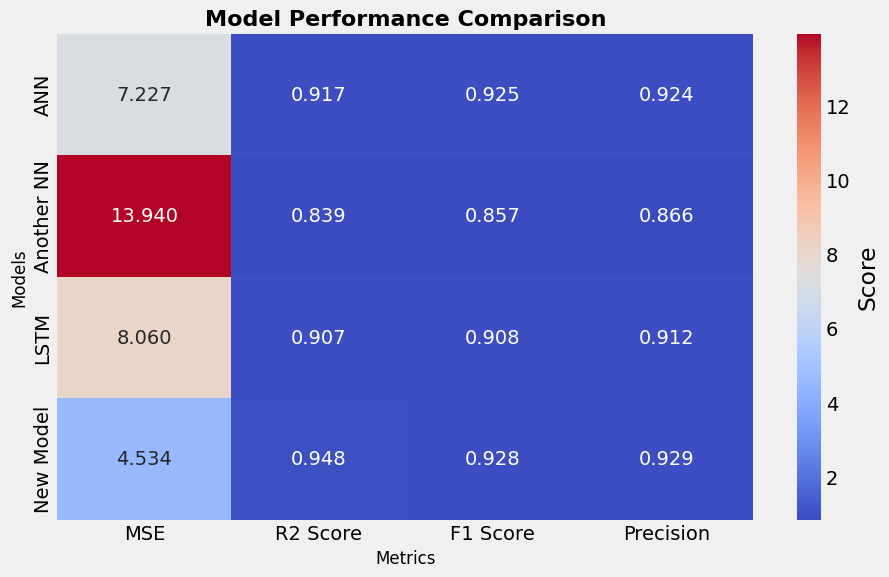

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the scores for each model
data = {
    'Model': ['ANN', 'Another NN', 'LSTM', 'New Model'],
    'MSE': [mse_ann, mse_dl, mse_lstm, mse_new],
    'R2 Score': [R2_ann, r2_dl, r2_lstm, r2_new],
    'F1 Score': [f1_ann, f1_dl, f1_lstm, f1_new],
    'Precision': [precision_ann, precision_dl, precision_lstm, precision_new]
}

# Convert the data into a DataFrame
scores_df = pd.DataFrame(data)

# Set the 'Model' column as the index for the heatmap
scores_df.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_df, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Score'})

# Update layout
plt.title("Model Performance Comparison", fontsize=16, weight='bold')
plt.ylabel("Models", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.show()



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Geospatial Analysis of Life Expectancy by Country</p>

In [61]:

import geopandas as gpd
import folium
from folium import GeoJsonTooltip
import branca

# Load the life expectancy data
data = pd.read_csv("/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv")

# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Load the world shapefile from your local path
world = gpd.read_file("/Users/kumarutkarsh/Desktop/minor final/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Ensure that country names match in both dataframes for merging
data['Country'] = data['Country'].str.strip()

# Keep only the latest year data for each country
latest_data = data.sort_values('Year', ascending=False).drop_duplicates('Country')

# Merge life expectancy data with the world map data on country names
world = world.rename(columns={"NAME": "Country"})
geo_data = world.merge(latest_data, on="Country", how="left")

# Debug: Print missing countries (if any)
missing_countries = world[~world['Country'].isin(latest_data['Country'])]
if not missing_countries.empty:
    print("Missing Countries:", missing_countries['Country'].tolist())

# Convert the merged GeoDataFrame to GeoJSON format for folium compatibility
geo_data_json = geo_data.to_json()

# Define color bins and create a colormap for life expectancy
life_expectancy_bins = [40, 50, 60, 65, 70, 75, 80, 85, 90]
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#3182bd", "#08519c", "#08306b"]
colormap = branca.colormap.StepColormap(
    colors=colors,
    vmin=min(life_expectancy_bins),
    vmax=max(life_expectancy_bins),
    caption="Life Expectancy"
)

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add GeoJson layer with custom styling based on life expectancy
def style_function(feature):
    life_expectancy = feature["properties"].get("Life expectancy", None)
    if life_expectancy is None:
        return {"fillColor": "grey", "color": "black", "weight": 0.5, "fillOpacity": 0.3}
    return {
        "fillColor": colormap(life_expectancy),
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.7,
    }

# Define tooltips for displaying country details
tooltip_fields = [
    "Country", "Year", "Life expectancy", "Adult Mortality", "infant deaths",
    "Alcohol", "percentage expenditure", "Hepatitis B", "Measles", "BMI",
    "under-five deaths", "Polio", "Total expenditure", "Diphtheria",
    "HIV/AIDS", "GDP", "Population", "thinness  1-19 years",
    "thinness 5-9 years", "Income composition of resources", "Schooling"
]
tooltip_aliases = [f"{field}:" for field in tooltip_fields]

# Add GeoJson layer with tooltip
folium.GeoJson(
    geo_data_json,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=tooltip_fields,
        aliases=tooltip_aliases,
        localize=True,
        sticky=True
    ),
).add_to(m)

# Add the custom color scale to the map
colormap.add_to(m)

# Save or display the map
m.save("life_expectancy_map_with_details.html")
m


Missing Countries: ['Tanzania', 'W. Sahara', 'Dem. Rep. Congo', 'Dominican Rep.', 'Russia', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Bolivia', 'Venezuela', 'Puerto Rico', 'Central African Rep.', 'Eq. Guinea', 'eSwatini', 'Palestine', 'Laos', 'Vietnam', 'North Korea', 'South Korea', 'Iran', 'Syria', 'Moldova', 'New Caledonia', 'Solomon Is.', 'Taiwan', 'United Kingdom', 'Brunei', 'Antarctica', 'N. Cyprus', 'Somaliland', 'Bosnia and Herz.', 'North Macedonia', 'Kosovo', 'S. Sudan']



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Geospatial Analysis of Prevalence of HIV by Country</p>

In [62]:

import geopandas as gpd
import folium
from folium import GeoJsonTooltip
import branca

# Load the life expectancy data
data = pd.read_csv("/Users/kumarutkarsh/Desktop/minor final/Life Expectancy Data 2.csv")

# Strip trailing spaces from column names
data.columns = data.columns.str.strip()

# Load the world shapefile from your local path
world = gpd.read_file("/Users/kumarutkarsh/Desktop/minor final/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Ensure that country names match in both dataframes for merging
data['Country'] = data['Country'].str.strip()

# Keep only the latest year data for each country
latest_data = data.sort_values('Year', ascending=False).drop_duplicates('Country')

# Merge HIV/AIDS data with the world map data on country names
world = world.rename(columns={"NAME": "Country"})
geo_data = world.merge(latest_data, on="Country", how="left")

# Debug: Print countries without HIV/AIDS data
missing_hiv_data = geo_data[geo_data["HIV/AIDS"].isnull()]
if not missing_hiv_data.empty:
    print("Countries without HIV/AIDS data:", missing_hiv_data["Country"].tolist())

# Fill missing values in the HIV/AIDS column with 0 for visualization
geo_data["HIV/AIDS"] = geo_data["HIV/AIDS"].fillna(0)

# Convert the merged GeoDataFrame to GeoJSON format for folium compatibility
geo_data_json = geo_data.to_json()

# Define color bins and create a colormap for HIV/AIDS prevalence
hiv_bins = [0, 0.1, 1, 5, 10, 20, 30]
colors = ["#e7e1ef", "#d4b9da", "#c994c7", "#df65b0", "#dd1c77", "#980043"]
colormap = branca.colormap.StepColormap(
    colors=colors,
    index=hiv_bins,
    vmin=min(hiv_bins),
    vmax=max(hiv_bins),
    caption="HIV/AIDS Prevalence (%)"
)

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add GeoJson layer with custom styling based on HIV/AIDS prevalence
def style_function(feature):
    hiv_prevalence = feature["properties"].get("HIV/AIDS", None)
    if hiv_prevalence is None or hiv_prevalence == 0:
        return {"fillColor": "grey", "color": "black", "weight": 0.5, "fillOpacity": 0.3}
    return {
        "fillColor": colormap(hiv_prevalence),
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.7,
    }

# Define tooltips for displaying country details (only HIV/AIDS)
tooltip_fields = ["Country", "Year", "HIV/AIDS"]
tooltip_aliases = ["Country:", "Year:", "HIV/AIDS Prevalence:"]

# Add GeoJson layer with tooltip
folium.GeoJson(
    geo_data_json,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=tooltip_fields,
        aliases=tooltip_aliases,
        localize=True,
        sticky=True
    ),
).add_to(m)

# Add the custom color scale to the map
colormap.add_to(m)

# Save or display the map
m.save("hiv_prevalence_map_fixed.html")
m


Countries without HIV/AIDS data: ['Tanzania', 'W. Sahara', 'Dem. Rep. Congo', 'Dominican Rep.', 'Russia', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Bolivia', 'Venezuela', 'Puerto Rico', 'Central African Rep.', 'Eq. Guinea', 'eSwatini', 'Palestine', 'Laos', 'Vietnam', 'North Korea', 'South Korea', 'Iran', 'Syria', 'Moldova', 'New Caledonia', 'Solomon Is.', 'Taiwan', 'United Kingdom', 'Brunei', 'Antarctica', 'N. Cyprus', 'Somaliland', 'Bosnia and Herz.', 'North Macedonia', 'Kosovo', 'S. Sudan']
